<h1><center><b>Formação Cientista de Dados</b></center></h1>
<h1><center>Curso: Big Data Real-Time Analytics com Python e Spark</center></h1><br>
<h2><center>Prevendo o Nível de Satisfação dos Clientes do Santander</center></h2>
<h3><center>Aluno: Thales Henrique Barros Cardoso</center></h3><br>

**Problema de Negócios**: Prever, através de aprendizado de máquina, se um determinado cliente está satisfeito ou não com o Santander, usando para isso recursos anônimos disponibilizados pela instituição.<br><br>
**Ferramentas**: Python 3, Jupyter Notebook.



<p align="justify"><h1>1. Análise Exploratória</h1></p>

<p align="justify"><h2>1.1. Formatação do conjunto de dados e tipo dos atributos</h2></p>

In [1]:
# Importação das primeiras bibliotecas a serem utilizadas na análise exploratória
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

print(sys.version)
print(pd.__version__)
print(np.__version__)



3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
0.24.2
1.16.2


In [2]:
# Importação e leitura dos dados
dadosTreino = pd.read_csv("train.csv")


In [3]:
# Dimensões do conjunto de dados
print("Dimensões do conjunto de dados:")
dadosTreino.shape


Dimensões do conjunto de dados:


(76020, 371)

<p align="justify">Observamos que o conjunto de dados fornecido contém 371 atributos para analisar. O que torna os dados bastante complexo e custoso, quando falamos principalmente no momento de se realizar o aprendizado de máquina para poder realizar a previsão desejada.<br>
De antemão já podemos visualizar a possibilidade de realizar uma redução de dimensionalidade após a exploração e tratamento dos dados, para assim reduzir a quantidade de atributos elegíveis a participar do treinamento, e diminuir o poder computacional necessário para treinar os algoritmos de apredizagem de máquina escolhidos.</p>

In [4]:
# Visualzando os tipos de dados de cada coluna
dadosTreino.dtypes.value_counts()


int64      260
float64    111
dtype: int64

<p align="justify">Vemos que não há atributos do tipo string ou data nos dados, apenas inteiros e reais (float), de acordo com o processamento realizado pelo pandas durante a leitura do arquivo csv. Porém muitos desses atributos são categóricos, entretanto as categorias são representadas por números inteiros. Com isso vamos tentar ver a quantidade de valores únicos em cada atributo inteiro para tentarmos justificar essa hipótese.</p>

In [5]:
# Criando um objeto com os atributos inteiros do conjunto de dados para verificar a quantidade de valores únicos contidos neles
variaveisInt = pd.DataFrame(dadosTreino.dtypes[dadosTreino.dtypes == "int64"])
variaveisInt.reset_index(level=0, inplace=True)
variaveisInt.columns = ["varNome", "Tipo"]

print("Lista dos atributos inteiros:\n")
print(variaveisInt)


Lista dos atributos inteiros:

                           varNome   Tipo
0                               ID  int64
1                             var3  int64
2                            var15  int64
3                       ind_var1_0  int64
4                         ind_var1  int64
5                       ind_var2_0  int64
6                         ind_var2  int64
7                       ind_var5_0  int64
8                         ind_var5  int64
9                       ind_var6_0  int64
10                        ind_var6  int64
11                      ind_var8_0  int64
12                        ind_var8  int64
13                     ind_var12_0  int64
14                       ind_var12  int64
15                     ind_var13_0  int64
16               ind_var13_corto_0  int64
17                 ind_var13_corto  int64
18               ind_var13_largo_0  int64
19                 ind_var13_largo  int64
20               ind_var13_medio_0  int64
21                 ind_var13_medio  int64
22 

In [6]:
# Imprimindo o a quantidade de valores unicos de cada atributo no conjunto de dados
for i in variaveisInt["varNome"]:
    print(i)
    print(len(np.unique(dadosTreino[i])))
    

ID
76020
var3
208
var15
100
ind_var1_0
2
ind_var1
2
ind_var2_0
1
ind_var2
1
ind_var5_0
2
ind_var5
2
ind_var6_0
2
ind_var6
2
ind_var8_0
2
ind_var8
2
ind_var12_0
2
ind_var12
2
ind_var13_0
2
ind_var13_corto_0
2
ind_var13_corto
2
ind_var13_largo_0
2
ind_var13_largo
2
ind_var13_medio_0
2
ind_var13_medio
2
ind_var13
2
ind_var14_0
2
ind_var14
2
ind_var17_0
2
ind_var17
2
ind_var18_0
2
ind_var18
2
ind_var19
2
ind_var20_0
2
ind_var20
2
ind_var24_0
2
ind_var24
2
ind_var25_cte
2
ind_var26_0
2
ind_var26_cte
2
ind_var26
2
ind_var25_0
2
ind_var25
2
ind_var27_0
1
ind_var28_0
1
ind_var28
1
ind_var27
1
ind_var29_0
2
ind_var29
2
ind_var30_0
2
ind_var30
2
ind_var31_0
2
ind_var31
2
ind_var32_cte
2
ind_var32_0
2
ind_var32
2
ind_var33_0
2
ind_var33
2
ind_var34_0
2
ind_var34
2
ind_var37_cte
2
ind_var37_0
2
ind_var37
2
ind_var39_0
2
ind_var40_0
2
ind_var40
2
ind_var41_0
2
ind_var41
1
ind_var39
2
ind_var44_0
2
ind_var44
2
ind_var46_0
1
ind_var46
1
num_var1_0
3
num_var1
3
num_var4
8
num_var5_0
5
num_var5
5
num_v

<p align="justify">Podemos observar que a maioria dos atributos inteiros possuem até no máximo 15 valores únicos. Alguns poucos vão até o valor de 100 valores únicos. E apenas dois atributos com mais de 100 valores únicos, já que ID é um atributo de identificação e não faria sentido ter poucos valores únicos. Levando em consideração essas quantidades de valores únicos, podemos aceitar a hipótese de que esses atributos do tipo inteiro são representações númericas de valores categóricos. Portanto, se faz necessário apagar o atributo ID, para que não seja produzido nenhum tipo de vies durante a aprendizagem de máquina<br>

In [7]:
dadosTreino = dadosTreino.drop('ID', axis=1)

<p align="justify"><h2>1.2. Análise da variável target</h2></p>

<p align="justify">Conseguimos ver que a variável target tem apenas dois valores, caracterizando uma situação de classificação. O fato de termos apenas duas classes se torna óbvio pelo fato do cliente está satisfeito ou não com a instituilção, e é justamente isso que precisamos predizer. É importante avaliar a proporção dos valores na variável target para que ela não esteja desbalanceada e prejudique o treinamento do algoritmo posteriormente.</p>

Valores absolutos dos valores da variável target:
0    73012
1     3008
Name: TARGET, dtype: int64


Porcentagem de valores do tipo 0:
96.04


Porcentagem de valores do tipo 1:
3.96




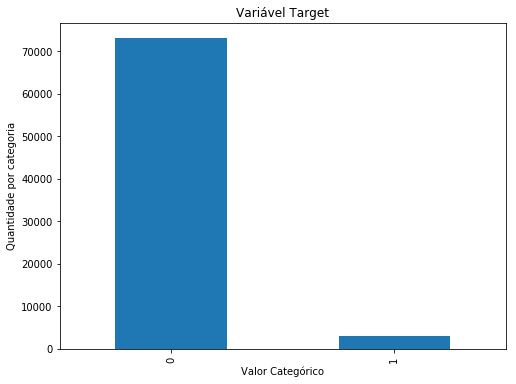

In [8]:
# Verificando desbalanceamento dos dados da variável target
bal = pd.Series(dadosTreino.TARGET).value_counts()

print("Valores absolutos dos valores da variável target:")
print(bal)
print("\n")
print("Porcentagem de valores do tipo 0:")
zero_target = bal[0] / (bal[0] + bal[1]) * 100
print(zero_target.round(2))
print("\n")
print("Porcentagem de valores do tipo 1:")
um_target = bal[1] / (bal[0] + bal[1]) * 100
print(um_target.round(2))
print("\n")

# Plot para uma melhor visualização da composição dos valores do atributo target
plt.figure(figsize = (8,6))
bal.plot(kind="bar")
plt.title("Variável Target")
plt.xlabel("Valor Categórico")
plt.ylabel("Quantidade por categoria")
plt.show()



<p align="justify">É evidente o desbalanceamento do atributo target no conjunto de dados train. Posteriormente será necessário realizar um tratamento para balancear as categorias do atributo, e assim poder realizar um treinamento de aprendizagem de máquina sem nenhum tipo de vies (bias) no algoritmo.<br>Porém antes disso vamos verificar outros aspectos como valores nulos contidos no conjunto de dados, como também observações que possam ter sido geradas de forma repetida, pois podem causar distorções desnecessárias no apredizado de máquina.</p>

In [9]:
print('Null values:', dadosTreino.isnull().sum().sum())
print('NA values:', dadosTreino.isna().sum().sum())

Null values: 0
NA values: 0


<p align="justify">Não há valores nulos do conjunto de dados que estamos trabalhando. Provavelmente esses dados já foram tratados pelo Santander com o intuito de agilizar a produção do modelo pretendido por eles.</p>

In [10]:
print('Duplicated rows:', dadosTreino.duplicated().sum())

Duplicated rows: 4807


<p align="justify">Após a exclusão do atributo ID, temos no nosso dataset 4807 observações duplicadas. Essas observações são prejudiciais ao treinamento do modelo de machine learning, então a melhor decisão é excluí-las do dataset</p>

In [11]:
dadosTreino = dadosTreino.drop_duplicates()
dadosTreino.shape

(71213, 370)

<p align="justify"><h2>1.3. Comportamento estatísticos dos atributos float</h2></p>

<p align="justify">Veremos que os atributos do tipo float estão em uma quantidade de 111, o que é demasiado grande para tentar explorar de forma gráfica, com histogramas e scatterplots e também difícil de visualizar a correlação com entre os atributos, isso demandaria um poder computacional extraordinário, portanto como condutor do processo de análise e exploração dos dados, vamos apenas observar os dados estatísticos disponibilizados pela função "describe".</p>

In [12]:
# Separando os atributos float em um dataframe para uma rápida visialização de algumas estatísticas desses atibutos
variaveisFloat = pd.DataFrame(dadosTreino.dtypes[dadosTreino.dtypes == "float64"])
variaveisFloat.reset_index(level=0, inplace=True)
variaveisFloat.columns = ["varNome", "Tipo"]
print("Quantidade dos atributos float:", (len(variaveisFloat)))
print("\n")

print("Algumas estatísticas dos atributos float:")
dadosTreino[variaveisFloat.varNome].describe()


Quantidade dos atributos float: 111


Algumas estatísticas dos atributos float:


,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,...,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000,7.121300e+04
mean,92.027471,77.247699,127.598088,3.799377,6.909616,0.440821,0.605650,3.374069,73.448321,120.688472,...,0.199228,8.471506,1.457296,13.040152,9.377014,33.631988,1.984032,81.158062,60.435917,1.171341e+05
std,1668.207086,350.042621,563.489653,96.243797,158.831665,31.620757,37.725462,98.427472,329.699561,528.287454,...,32.937783,471.017951,117.742551,809.203403,556.310507,2079.944379,152.692314,4174.428008,2947.246442,1.882276e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.587463e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.002062e+05
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.228152e+05
max,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,12888.030000,16566.810000,...,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07


<p align="justify">A maioria dos atributos possuem o valor da mediana menor que o valor da média, no caso também é importante observar qur a mediana e o 3º quartil tem o valor de zero, nos levando ao entendimento de que os atributos possuem uma assimetria negativa, onde então os valores se agrupam do lado direito do histograma.<br>Também é importante destacar que há uma dispersão muito grande nos valores, percebidos quando comparamos os valores das médias com os valores dos desvios padrão dos atributos. Muitas das vezes o desvio padrão está muito distante da média.</p>

<p align="justify"><h1>2. Preparação para o algoritmo de aprendizagem de máquina</h1></p>


<p align="justify"><h2>2.1. Divisão do dados de treino e teste</h2></p>

<p align="justify">Naturalmente, é necessário a divisão dos dados de treino e teste, que de certa forma já foi feita pela instituição que forneceu os dados para o projeto. Dessa forma será apenas necessário adequar à forma como a lingaugem python trabalha. Para isso vamos criar algumas variáveis como y_treino, onde serão alocados os valores da variável target. Também criaremos a variável x_treino, na qual deletaremos o atributo target e criaremos a x_teste, que será um dataframe onde faremos a leitura do arquivo disponibilizado com os dados de teste.</p>

In [13]:
from sklearn.model_selection import train_test_split

# Divisão dos dados para treinamento e validação do modelo criado
X_train = dadosTreino.drop('TARGET', axis=1)
Y_train = dadosTreino.TARGET

seed = 10
size = 0.3

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = size, random_state = seed)

# Leitura do conjunto de dados de submissão para avaliaçao do modelo criado
x_submission = pd.read_csv("test.csv")
x_submission = x_submission.drop('ID', axis=1)
y_submission = pd.read_csv("sample_submission.csv")
y_submission = y_submission.TARGET

# Visualizando as dimensões dos dados dividos
print('Treino:', x_train.shape) 
print('Teste', x_test.shape)
print('Submissão:', x_submission.shape)

# Salvando o progresso feito até agora com o tratamento dos dados
x_train.to_csv("x_train.csv")
x_test.to_csv("x_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

Treino: (49849, 369)
Teste (21364, 369)
Submissão: (75818, 369)


C:\Users\thale\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
C:\Users\thale\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


<p align="justify">O dataset com as informações para fazer a submissão posteriormente tem aproximadamente as mesmas dimensões do dataset de treino, que foi divido entre treino e teste, sendo um pouco menor em aproximadamente 1000 observações. Aproveitamos e guardamos esses dataframes, para que havendo a necessidade não seja necessário refazer todo o processo de leitura e divisão dos arquivos.</p>


<p align="justify"><h2>2.2. Tratamento de variáveis constantes, quase-constantes e com forte correlação</h2></p>


<p align="justify"><h3>2.2.1. Variáveis constantes</h3></p>


<p align="justify">Esse tipo de variável não contribui muito para o processo de aprendizagem do algoritmo. Normalmente são caracterizadas por terem o mesmo valor em todas as observações feitas ou em quase todas, indicando uma baixa variância nos dados.</p>

In [14]:
from sklearn.feature_selection import VarianceThreshold

# Criação dos atributos não constantes do dataset
vars_threshold = VarianceThreshold(threshold=(0)).fit(x_train)

# Quantidade de atributos não cosntantes
x_train.columns[vars_threshold.get_support()].size
print('Non-constant attributes:', x_train.columns[vars_threshold.get_support()].size)

# Quantidade de atributos constantes
vars_constants = [col for col in x_train.columns if col not in x_train.columns[vars_threshold.get_support()]]
print('Constant attributes:', len(vars_constants))

# Lista dos atributos constantes
print("\n", "List of constant attributes:")
vars_constants

Non-constant attributes: 334
Constant attributes: 35

 List of constant attributes:


['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var29_hace3']

<p align="justify">Com os atributos constantes conhecidos podemos exclui-los do dataset, pois essas informações se tornam irrelevantes ou até mesmo atrapalham a construção do modelo a ser criado.</p>

In [15]:
x_train = x_train.drop(vars_constants, axis=1)
x_train.shape

(49849, 334)

<p align="justify"><h3>2.2.2. Variáveis quase-constantes</h3></p>


<p align="justify">Esses atributos possuem uma variância muito pequena, porém podem prejudicar também o modelo de machine learning. De antemão vamos verificar a quantidade e excluir os atributos quase-contantes.</p>

In [16]:
# Criação dos atributos não quasi-constantes
vars_threshold = VarianceThreshold(threshold=(0.01)).fit(x_train)

# Quantidade de atributos não quasi-constantes
x_train.columns[vars_threshold.get_support()].size
print('Non quasi-constant attributes:', x_train.columns[vars_threshold.get_support()].size)

# Quantidade de atributos quasi-constantes
vars_quasi_constant = [col for col in x_train.columns if col not in x_train.columns[vars_threshold.get_support()]]
print('Quasi-constant attributes:', len(vars_quasi_constant))

# Lista dos atributos constantes
print("\n", "List of quasi-constant attributes:")
vars_quasi_constant

Non quasi-constant attributes: 274
Quasi-constant attributes: 60

 List of quasi-constant attributes:


['ind_var1',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'ind_var7_emit_ult1',
 'ind_var7_recib_ult1',
 'num_aport_var33_hace3',
 'num_aport_var33_ult1',
 'num_var7_emit_ult1',
 'num_meses_var13_medio_ult3',
 'num_meses_var17_ult3',
 'num_meses_var29_ult3',
 'num_meses_var33_ult3',
 'num_meses_var44_ult3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var33_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1'

In [17]:
x_train = x_train.drop(vars_quasi_constant, axis=1)
x_train.shape

(49849, 274)

<p align="justify"><h3>2.2.3. Correlação entre as variáveis</h3></p>

<p align="justify">A correlação, indica a força e a direção do relacionamento estatístico entre duas variáveis. Um bom conjunto de variáveis preditoras, possui uma baixa correlação entre si (com valores próximos de 0) e uma alta correlação com a variável target (com valores próximos de -1 e 1).<br>
As variáveis perfeitamente correlacionadas (com correlação igual a -1 e 1), carregam exatamente as mesmas informações, e também devem ser removidas.</p>

In [18]:
var_correlation = x_train.corr()

In [19]:
# Com essa função vamos pegar apenas a primeira ocorrência dos atributos que possuem uma correlação maior que 0,7.

def correlation(threshold):

  global var_correlation
  column_high_corr = set()

  for i in range(len(var_correlation.columns)):
    for j in range(i):
      if abs(var_correlation.iloc[i, j] > threshold):
        colnames = var_correlation.columns[i]
        column_high_corr.add(colnames)

  return column_high_corr


In [20]:
high_corr = correlation(0.7)

In [21]:
# Verificando a quantidade de atributos com alta correlação
high_corr = list(high_corr)
len(high_corr)


173

<p align="justify">Verificamos que há 173 elementos que possuem uma alta correlação. Quando isso ocorre podemos dizer que os atributos representam praticamente a mesma informação, isso se torna uma ruído durante o treinamento do modelo de machine learning, portanto é importante que seja dado um tratamento, sendo assim escolhemos excluir esses atributos.<br>Observaremos que o conjunto de dados permanecerá ainda com 101 atributos, o que ainda é bastante para um treinamento de modelo, buscaremos outras formas de diminuir ainda mais atributos desnecessários ao processo.</p>

In [22]:
x_train = x_train.drop(high_corr, axis=1)
x_train.shape

(49849, 101)

<p align="justify"><h3>2.2.4. Estimativa de informações mútuas</h3></p>

<p align="justify">O Scikit Learn oferece uma função para feature selection que faz uma estimativa mútua de informações para uma variável target do tipo dicreta. A informação mútua entre duas variáveia aleatórias é um valor não negativo, o qual mede a dependência entre elas duas. É igual a zero se e somente se as duas variáveis são independentes, e valores maiores significa maior dependência.</p>




In [23]:
# Carrengando o pacote
from sklearn.feature_selection import mutual_info_classif

# Avaliando a dependência ou não dos atributos com a variável target
mutual_info = mutual_info_classif(x_train, y_train)

# Adaptando para melhor visualização dos dados
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns


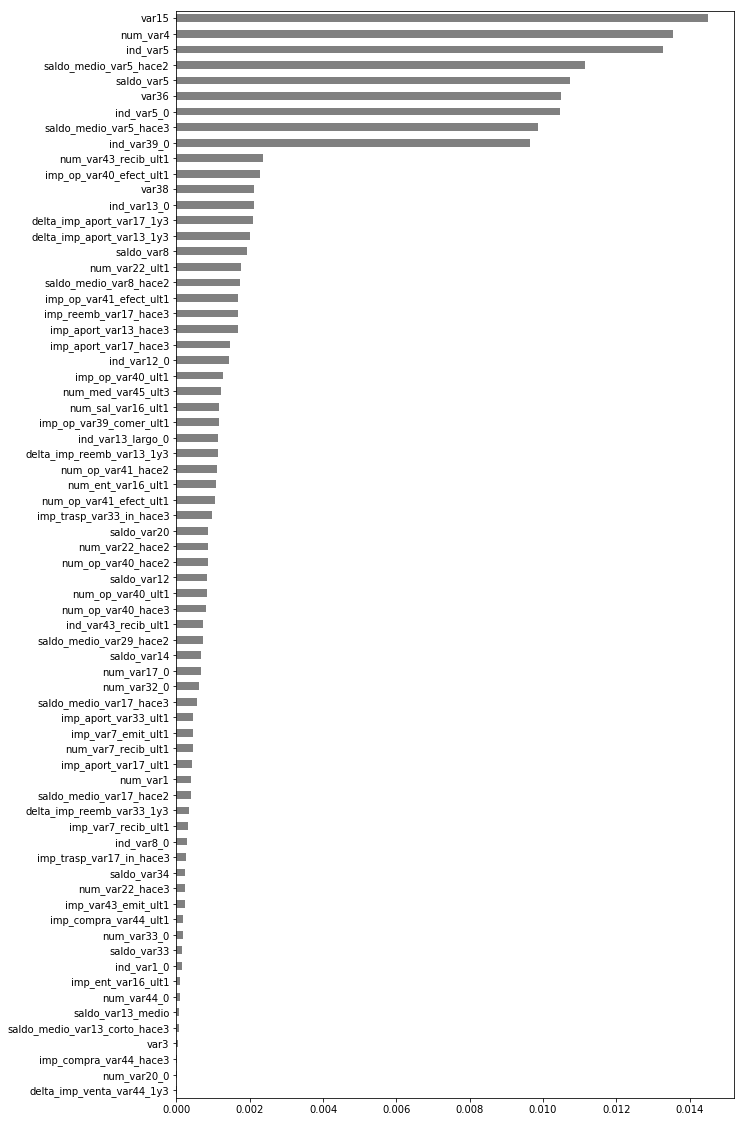

In [24]:
# Plot das variáveis mais dependentes
mutual_info[mutual_info > 0].sort_values(ascending = True).plot(figsize=(10,20), kind = 'barh', color = 'gray')

<p align="justify">É importante saber a quantidade de valores dependentes e independentes em relação a variável target. Os valores que são independentes não interessam para análise, pois não farão diferença na hora do treinamento do modelo de machine learning, já por outro lado as variáveis dependentes farão diferença no resultado final do modelo. Como podemos ver abaixo exitem 63 atributos que possuem dependência com a variável target. A decisão nesse caso é de excluir os atributos independentes e realizar algum outro critério de escolha para os 63 atributos restantes, tentando buscar os que possuem as melhores afinidades com a variável target.</p>

In [25]:
print('Atributos independentes:', len(mutual_info[mutual_info == 0]))
print('Atributos dependentes:', len(mutual_info[mutual_info > 0]))

Atributos independentes: 31
Atributos dependentes: 70


In [26]:
# Excluindo os atributos independentes
x_train = x_train.drop(mutual_info[mutual_info == 0].index, axis=1)
x_train.shape

(49849, 70)

<h3>2.2.5. Random Forest para feature selection</h3>

<p align="justify">O algoritmo do Random Forest é uma importante ferramenta para a realização do feature selection, pois atrvés dele é possível visualizar os principais atributos, em ordem de importância, que influenciam no treinamento do modelo pretendido.</p>

In [27]:
# Realizando tarefa de seleção de variáveis com Random Forest
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo
clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

# Treinando o modelo para verificar a importância dos atributos
importance = clf.fit(x_train, y_train)

# Colocando os atributos em ordem decrescente de importância
vars_best = pd.DataFrame({'Attribute': x_train.columns,
                          'Importance': importance.feature_importances_})


vars_best.sort_values('Importance', ascending=False)


,Attribute,Importance
69,var38,4.247660e-01
1,var15,1.838767e-01
63,saldo_medio_var5_hace3,5.900078e-02
62,saldo_medio_var5_hace2,4.565376e-02
26,saldo_var5,3.781057e-02
58,num_med_var45_ult3,2.917810e-02
55,num_var22_hace2,2.340956e-02
56,num_var22_hace3,2.187254e-02
57,num_var22_ult1,1.664752e-02
16,num_var4,1.574161e-02


In [28]:
# Atributos com relação maior que 0.001 com a variável target
len(vars_best[vars_best['Importance'] > 0.001])

33

<p align="justify">No exposto acima podemos observar que existe atributoa que possuem baixa relação com a variável target. Algumas delas apresentando valores menores que 0.001. Devido a isso, esse atributos tronam-se ruído quando pensamos no treinamento do modelo de machine learning. Portanto vamos exdcluir todos esses atributos do nosso conjunto de dados de treinamento</p>

In [29]:
reduced_x_train = x_train[vars_best[vars_best['Importance'] > 0.001]['Attribute']]
reduced_x_train.to_csv("reduced_x_train.csv")
reduced_x_train.shape

(49849, 33)

<p align="justify">Os atributos de treinamento selecionados ficaram em torno de 34, o que ainda pode ser considerado muito a depender da quantidade de observações que o conjunto de dados tenha. Porém iremos continuar com o projeto considerando que chegamos em um valor adequado, se for necessário, posteriormente faremos uma redução de dimensionalidade utilizando o algoritmo do PCA, para reduzir ainda mais o número de atributos do dataset.</p>

In [30]:
# Alterando os atributos do dataset de teste x_test
reduced_x_test = x_test[reduced_x_train.columns]
reduced_x_test.shape

(21364, 33)

<p align="justify"><h2>2.3. Balanceamento da variável target</h2></p>

<p align="justify">Balancear a variável target é de fundamental importância quando estamos realizando um projeto de machine learning cujo o objetivo é classificar categorias. Se a variável target, durante o treinamento estiver desbalanceada, provocará um viés de saber indentificar apenas a categoria na qual se tem mais observações. Para resolver isso vamos treinar nossos dados em um algoritmo que realizará esse balanceamento sem a necessidade de deletar observações. O algoritmo em questão é o SMOTE.</p>

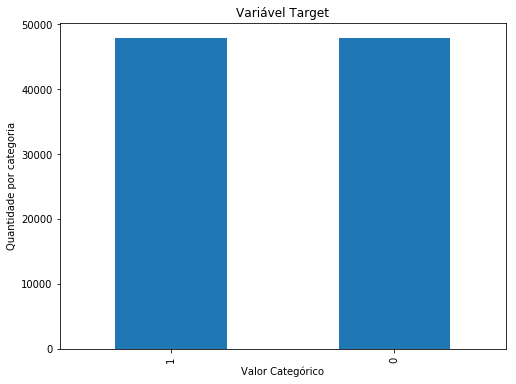

In [31]:
# Instalando o pacote imbalanced-learn para usar a função SMOTE para balancear a variável (atributo) target
# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

# Balanceando de forma randômica o dataset de treino do modelo de machine learning
smote = SMOTE(random_state = 10)

#balanced_x_train, balanced_y_train = smote.fit_sample(reduced_x_train, y_train)
balanced_x_train, balanced_y_train = smote.fit_resample(reduced_x_train, y_train)

# Criando uma visualização
plt.figure(figsize=(8,6))
pd.value_counts(balanced_y_train).plot(kind="bar")
plt.title("Variável Target")
plt.xlabel("Valor Categórico")
plt.ylabel("Quantidade por categoria")
plt.show()


In [32]:
# Essas celulas de verificação podem ser deletadas posteriormente para não poluir muito o projeto.

# Novo formato dos dados de treino após a utilização da função SMOTE para balanceamento da variável target
print(balanced_x_train.shape)
print(balanced_y_train.shape)

# Aproveitaremos e testaremos se esse processo gerou dados NA
print(pd.DataFrame(balanced_x_train).isnull().values.any())
print(pd.DataFrame(balanced_y_train).isnull().values.any())

# Salvando o progresso
pd.DataFrame(balanced_x_train).to_csv("balanced_x_train.csv")
pd.DataFrame(balanced_y_train).to_csv("balanced_y_train.csv")

(95666, 33)
(95666,)
False
False


<p align="justify">Podemos ver, através do gráfico, que a variável target está balanceada e o novo dimensionamnto do nosso conjunto de dados de treinamento tem praticamente o dobro de observações (observações essas criadas através de métodos estatísticos utilizados pelo SMOTE)</p>

<p align="justify"><h1>3. Aplicação dos modelos de machine learning</h1></p>

<p align="justify">Vamos aplicar alguns modelos de algoritmos aos nossos dados de treino para depois avaliar com os dados de teste, os quais o algoritmo não terá contato. Dessao forma podemos avaliar se ocorreu overfitting ou underfitting durante o treinamento. Escolhemos 5 algoritmos de classificação para verificarmos qual o melhor deles para o nosso problema de negócios. Entre eles temos KNN, SVM, GaussianNB, RandomForestClassifier, ExtraTreesClassifier, DecisionTreeClassifier, AdaBosstClassifier, GradientBoostingClassifier e o MLPClassifier(Rede Neural). Como o conjunto de dados é pequeno, vamos testar com os dados normais, normalizados e padronizados e ver qual o que tem a melhor acurácia.</p>

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

def classification(x_tr, y_tr, x_te, y_te, method):

  normalized = MinMaxScaler()
  standard = StandardScaler()

  # Atribuindo e treinando o modelo escolhido. Realizando a predição
  model = method()

  # Treinando um modelo com dados não transformados
  model.fit(x_tr, y_tr)
  p_train = model.predict(x_tr)
  p_test = model.predict(x_te)

  # Treinando modelo com dados normalizados
  x_norm_train = normalized.fit_transform(x_tr)
  x_norm_test = normalized.fit_transform(x_te)
  
  model.fit(x_norm_train, y_tr)
  p_train_norm = model.predict(x_norm_train)
  p_test_norm = model.predict(x_norm_test)

  # Treinando modelo com dados padronizados
  x_std_train = standard.fit_transform(x_tr)
  x_std_test = standard.fit_transform(x_te)
  
  model.fit(x_std_train, y_tr)
  p_train_std = model.predict(x_std_train)
  p_test_std = model.predict(x_std_test)

  # Visualizando a Confusion Matrix
  cm = confusion_matrix(y_te, p_test)
  cm_norm = confusion_matrix(y_te, p_test_norm)
  cm_std = confusion_matrix(y_te, p_test_std)

  print("CONFUSION MATRIX:\n")
  print("Original Data:\n", cm)
  print("Normalized Data\n:", cm_norm)
  print("Standardized Data\n:", cm_std)
  print("\n")

  # Acurácia dos dados de treino
  print("TRAIN ACCURACY SCORE:\n")
  print("Original Data:", accuracy_score(y_tr, p_train))
  print("Normalized Data:", accuracy_score(y_tr, p_train_norm))
  print("Standardized Data:", accuracy_score(y_tr, p_train_std))

  print("\n")

  # Acurácia dos dados de teste
  print("TEST ACCURACY SCORE:\n")
  print("Original Data:", accuracy_score(y_te, p_test))
  print("Normalized Data:", accuracy_score(y_te, p_test_norm))
  print("Standardized Data:", accuracy_score(y_te, p_test_std))

  #print('-'*20)

  print("\n")

  # Plot da Confusion Matrix
  cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
  cmd_norm = ConfusionMatrixDisplay(cm_norm, display_labels=['0','1'])
  cmd_std = ConfusionMatrixDisplay(cm_std, display_labels=['0','1'])

  print("Original Data:\n")
  cmd.plot()
  print("Normalized Data:\n")
  cmd_norm.plot()
  print("Standardized Data:\n")
  cmd_std.plot()


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


CONFUSION MATRIX:

Original Data:
 [[16133  4432]
 [  466   333]]
Normalized Data
: [[17740  2825]
 [  468   331]]
Standardized Data
: [[13460  7105]
 [  370   429]]


TRAIN ACCURACY SCORE:

Original Data: 0.9019609892751866
Normalized Data: 0.9284071666004641
Standardized Data: 0.9315326239207242


TEST ACCURACY SCORE:

Original Data: 0.7707358172626849
Normalized Data: 0.8458621980902453
Standardized Data: 0.650112338513387


Original Data:

Normalized Data:

Standardized Data:



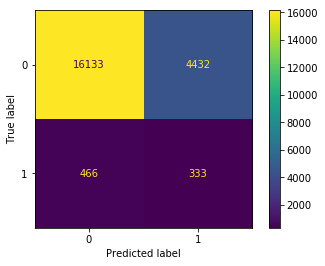

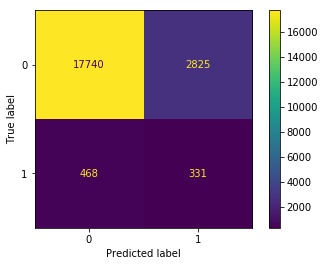

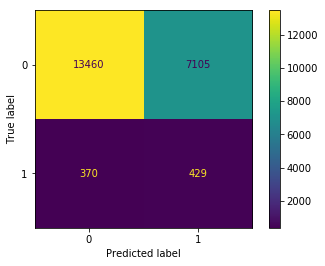

In [35]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, KNeighborsClassifier)

CONFUSION MATRIX:

Original Data:
 [[ 1900 18665]
 [   25   774]]
Normalized Data
: [[ 6512 14053]
 [  146   653]]
Standardized Data
: [[ 3637 16928]
 [   62   737]]


TRAIN ACCURACY SCORE:

Original Data: 0.5338678318315807
Normalized Data: 0.5966173980306483
Standardized Data: 0.5966173980306483


TEST ACCURACY SCORE:

Original Data: 0.1251638269986894
Normalized Data: 0.3353772701741247
Standardized Data: 0.20473694064781875


Original Data:

Normalized Data:

Standardized Data:



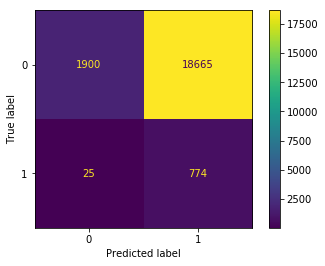

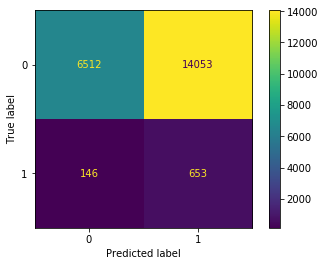

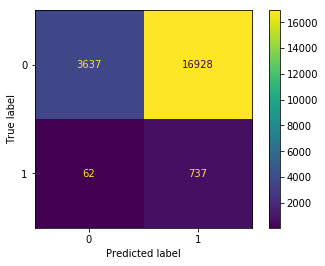

In [36]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, GaussianNB)

C:\Users\thale\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\thale\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

CONFUSION MATRIX:

Original Data:
 [[13358  7207]
 [  281   518]]
Normalized Data
: [[15034  5531]
 [  295   504]]
Standardized Data
: [[12092  8473]
 [  185   614]]


TRAIN ACCURACY SCORE:

Original Data: 0.6720151359939791
Normalized Data: 0.7863713335981436
Standardized Data: 0.7973261137708276


TEST ACCURACY SCORE:

Original Data: 0.6495038382325408
Normalized Data: 0.7272982587530425
Standardized Data: 0.5947388129563752


Original Data:

Normalized Data:

Standardized Data:



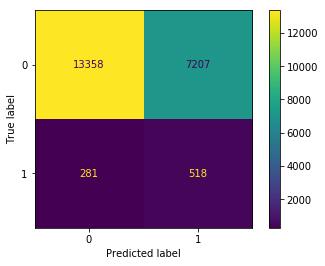

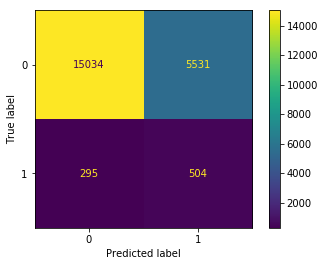

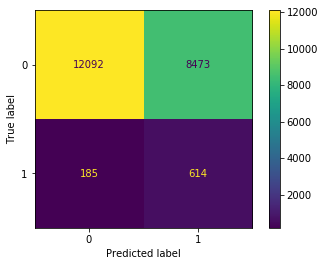

In [37]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, LogisticRegression)

CONFUSION MATRIX:

Original Data:
 [[19444  1121]
 [  588   211]]
Normalized Data
: [[15580  4985]
 [  366   433]]
Standardized Data
: [[ 5262 15303]
 [  116   683]]


TRAIN ACCURACY SCORE:

Original Data: 0.9977107854410135
Normalized Data: 0.974923170196308
Standardized Data: 0.9976585202684339


TEST ACCURACY SCORE:

Original Data: 0.9200056169256694
Normalized Data: 0.7495319228608874
Standardized Data: 0.27827185920239655


Original Data:

Normalized Data:

Standardized Data:



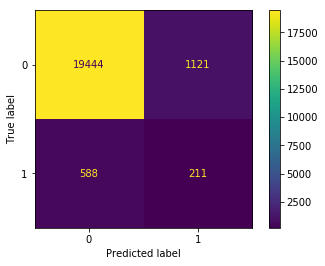

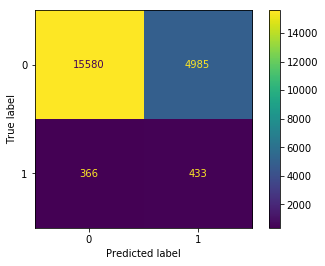

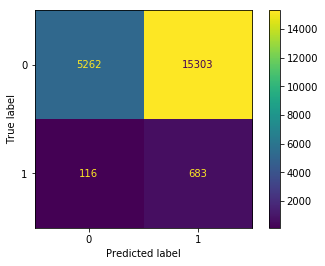

In [38]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, RandomForestClassifier)

CONFUSION MATRIX:

Original Data:
 [[19353  1212]
 [  572   227]]
Normalized Data
: [[16056  4509]
 [  372   427]]
Standardized Data
: [[ 4502 16063]
 [  302   497]]


TRAIN ACCURACY SCORE:

Original Data: 0.9977107854410135
Normalized Data: 0.9964564212991032
Standardized Data: 0.9977107854410135


TEST ACCURACY SCORE:

Original Data: 0.9164950383823254
Normalized Data: 0.7715315483991761
Standardized Data: 0.23399176184235163


Original Data:

Normalized Data:

Standardized Data:



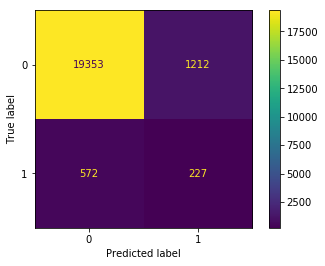

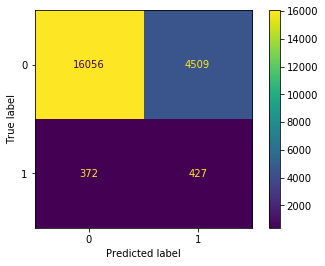

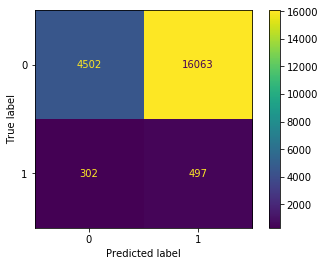

In [39]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, ExtraTreesClassifier)

CONFUSION MATRIX:

Original Data:
 [[19105  1460]
 [  616   183]]
Normalized Data
: [[16669  3896]
 [  668   131]]
Standardized Data
: [[13750  6815]
 [  605   194]]


TRAIN ACCURACY SCORE:

Original Data: 0.9977107854410135
Normalized Data: 0.9948466539836515
Standardized Data: 0.9976794263374658


TEST ACCURACY SCORE:

Original Data: 0.9028271859202397
Normalized Data: 0.7863695937090432
Standardized Data: 0.6526867627785059


Original Data:

Normalized Data:

Standardized Data:



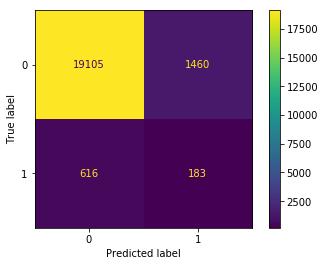

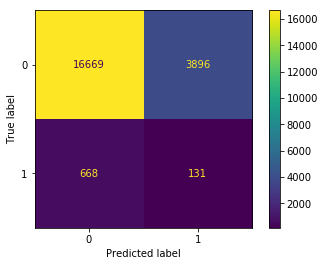

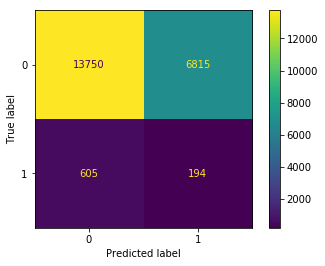

In [40]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, DecisionTreeClassifier)

CONFUSION MATRIX:

Original Data:
 [[18016  2549]
 [  381   418]]
Normalized Data
: [[17380  3185]
 [  355   444]]
Standardized Data
: [[ 2929 17636]
 [   53   746]]


TRAIN ACCURACY SCORE:

Original Data: 0.8798737273430477
Normalized Data: 0.876183806158928
Standardized Data: 0.875138502707336


TEST ACCURACY SCORE:

Original Data: 0.8628533982400299
Normalized Data: 0.8343006927541659
Standardized Data: 0.1720183486238532


Original Data:

Normalized Data:

Standardized Data:



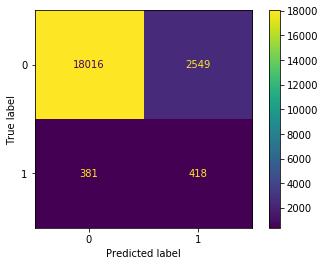

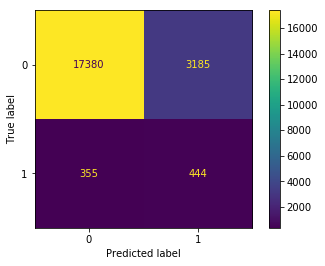

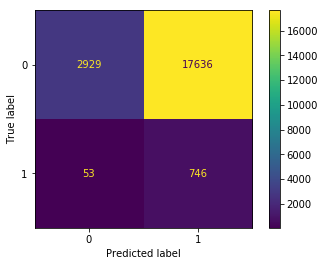

In [41]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, AdaBoostClassifier)

CONFUSION MATRIX:

Original Data:
 [[18570  1995]
 [  421   378]]
Normalized Data
: [[16929  3636]
 [  318   481]]
Standardized Data
: [[ 3706 16859]
 [   45   754]]


TRAIN ACCURACY SCORE:

Original Data: 0.89915957602492
Normalized Data: 0.8938285284218008
Standardized Data: 0.8987832667823469


TEST ACCURACY SCORE:

Original Data: 0.8869125631904138
Normalized Data: 0.8149222991949073
Standardized Data: 0.20876240404418647


Original Data:

Normalized Data:

Standardized Data:



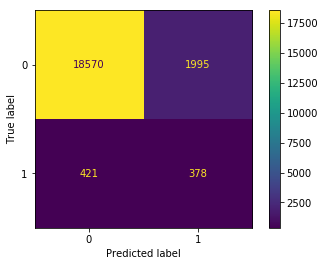

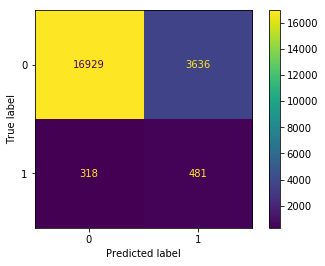

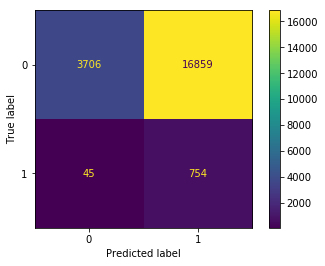

In [42]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, GradientBoostingClassifier)

C:\Users\thale\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\thale\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CONFUSION MATRIX:

Original Data:
 [[19333  1232]
 [  540   259]]
Normalized Data
: [[18508  2057]
 [  447   352]]
Standardized Data
: [[ 8305 12260]
 [  173   626]]


TRAIN ACCURACY SCORE:

Original Data: 0.6999979093930968
Normalized Data: 0.8798423682394999
Standardized Data: 0.9045010766625552


TEST ACCURACY SCORE:

Original Data: 0.9170567309492604
Normalized Data: 0.8827934843662235
Standardized Data: 0.41803969294139676


Original Data:

Normalized Data:

Standardized Data:



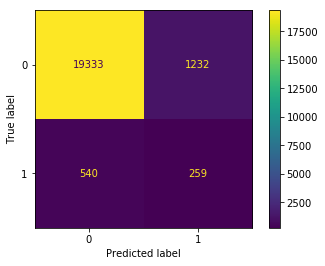

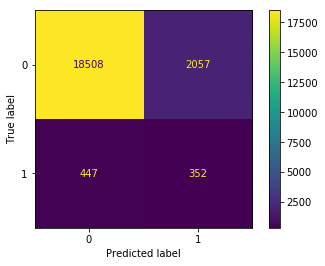

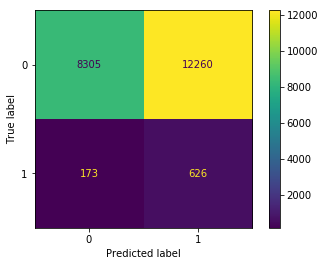

In [43]:
classification(balanced_x_train, balanced_y_train, reduced_x_test, y_test, MLPClassifier)

<p align="justify">Pelos resultados temos o algoritmo Random Forest como sendo o melhor entre os selecionados para os primeiros testes. A acurácia nos dados de teste foi bem satisfatória, tão quanto a acurária de treino. Com esses resultados, agora se faz necessário otimizar o modelo que já foi o melhor entre os escolhidos</p>

<p align="justify"><h2>3.1. Otimização do do algoritmo Random Forest</h2></p>

<p align="justify">Com os resultados obtidos com os treinamentos dos modelos de machine learning, observamos que o algoritmo do random forest foi o que obteve melhor performance entre todos eles, utilizando os dados originais, sem normalização e nem padronização. Com isso vamos buscar melhorar a performance dele otimizando os hiperparâmetros possíveis do modelo.</p>

In [44]:
from sklearn.model_selection import GridSearchCV

def best_value(x_tr, y_tr, model, parameter, values):
    
    valores_grid = {parameter: np.array(values)}

    # Criando o modelo
    modelo = model()

    # Criando o grid
    grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
    grid.fit(x_tr, y_tr)

    # Print do resultado
    print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

In [64]:
best_value(balanced_x_train, balanced_y_train, RandomForestClassifier, 'n_estimators', [50, 100, 200])

Melhores Parâmetros do Modelo:
 RandomForestClassifier(n_estimators=200)


In [56]:
best_value(balanced_x_train, balanced_y_train, RandomForestClassifier, 'n_jobs', [-1,1,3,5])

Melhores Parâmetros do Modelo:
 RandomForestClassifier(n_jobs=5)


In [57]:
best_value(balanced_x_train, balanced_y_train, RandomForestClassifier, 'max_depth', [10,20,30,40,50])

Melhores Parâmetros do Modelo:
 RandomForestClassifier(max_depth=40)


<p align="justify">Apos a realização da otimização de alguns parâmetros do algoritmo Random Forest, vamos aplicar novamente os dados no algoritmo para verificar se terá algum ganho em relação a acurácia de teste.</p>

CONFUSION MATRIX:

Original Data:
 [[19461  1104]
 [  585   214]]


TRAIN ACCURACY SCORE:

Original Data: 0.9977107854410135


TEST ACCURACY SCORE:

Original Data: 0.9209417712038944


Original Data:



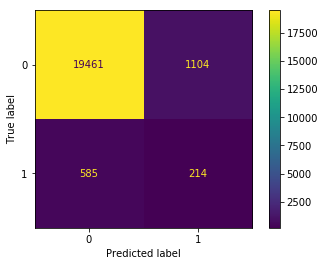

In [46]:
# Atribuindo e treinando o modelo escolhido. Realizando a predição
model = RandomForestClassifier(n_estimators=200)

# Treinando um modelo com dados não transformados
model.fit(balanced_x_train, balanced_y_train)
p_train = model.predict(balanced_x_train)
p_test = model.predict(reduced_x_test)

# Visualizando a Confusion Matrix
cm = confusion_matrix(y_test, p_test)

# Confusion Matrix
print("CONFUSION MATRIX:\n")
print("Original Data:\n", cm)
print("\n")

# Acurácia dos dados de treino
print("TRAIN ACCURACY SCORE:\n")
print("Original Data:", accuracy_score(balanced_y_train, p_train))
print("\n")

# Acurácia dos dados de teste
print("TEST ACCURACY SCORE:\n")
print("Original Data:", accuracy_score(y_test, p_test))
print("\n")

# Plot da Confusion Matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
print("Original Data:\n")
cmd.plot()
  

<p align="justify">Observamos que tivemos um ganho pouco significativo no resultado da acurácia do modelo após a otimização do parâmetro n_estimators. Entretanto, isso se torna bastante significativo se considerarmos uma grande quantidade de previsões feitas. Observe que apesar de termos avaliados três parâmetros, utilizamos apenas um para a tentar a otimização, já que tentar otimizar com os três selecionados não foi uma prática satisfatória, não tendo ganho de acurácia no modelo pretendido.</p>

<h2>3.2. Utilizando PCA para reduzir a dimensionalidade do modelo</h2>

<p align="justify">Com o intuito de buscar uma melhoria no algoritmo Random Forest, vamos testar a realização de uma redução de dimensionalidade através do PCA (principal component analysis), tentando reduzir ainda mais a quantidade de atributos no conjunto de dados, visando um ganho de acurácia do modelo.</p>

In [52]:
# Padronizando os dados para utilização no algpritmo do PCA utilizando a função MinMaxScaler/StandardScalar do pacote sklearn.preprocessing

standard = StandardScaler()
normalized = MinMaxScaler()

x_train_std = standard.fit_transform(balanced_x_train)
x_test_std = standard.fit_transform(reduced_x_test)

x_train_norm = normalized.fit_transform(balanced_x_train)
x_test_norm = normalized.fit_transform(reduced_x_test)

In [53]:
# Algoritmo de PCA
from sklearn.decomposition import PCA

#pca = PCA(0.95)
pca = PCA(n_components=15)

# Reduzindo os atributos com os dados normalizados
x_train_pca_norm = pca.fit_transform(x_train_norm)
x_test_pca_norm = pca.fit_transform(x_test_norm)

# Reduzindo os atributos com os dados padronizados
x_train_pca_std = pca.fit_transform(x_train_std)
x_test_pca_std = pca.fit_transform(x_test_std)

CONFUSION MATRIX:

Original Data:
 [[ 6856 13709]
 [  442   357]]


TRAIN ACCURACY SCORE:

Original Data: 0.9573829782785943


TEST ACCURACY SCORE:

Original Data: 0.33762404044186484


Original Data:



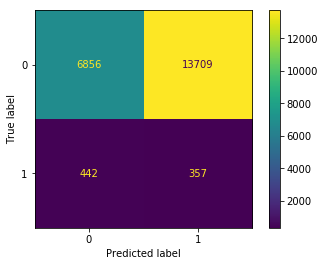

In [54]:
# Aplicando os dados com redução de dimensionalidade no algoritmo do Random Forest
model_pca = RandomForestClassifier(n_estimators=200)

# Treinando um modelo com dados normalizados
model_pca.fit(x_train_pca_norm, balanced_y_train)
p_train = model_pca.predict(x_train_pca_norm)
p_test = model_pca.predict(x_test_pca_norm)

# Visualizando a Confusion Matrix
cm = confusion_matrix(y_test, p_test)

# Confusion Matrix
print("CONFUSION MATRIX:\n")
print("Original Data:\n", cm)
print("\n")

# Acurácia dos dados de treino
print("TRAIN ACCURACY SCORE:\n")
print("Original Data:", accuracy_score(balanced_y_train, p_train))
print("\n")

# Acurácia dos dados de teste
print("TEST ACCURACY SCORE:\n")
print("Original Data:", accuracy_score(y_test, p_test))
print("\n")

# Plot da Confusion Matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
print("Original Data:\n")
cmd.plot()

CONFUSION MATRIX:

Original Data:
 [[ 8880 11685]
 [  567   232]]


TRAIN ACCURACY SCORE:

Original Data: 0.9975226308197269


TEST ACCURACY SCORE:

Original Data: 0.42651188915933347


Original Data:



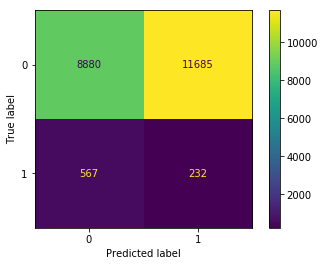

In [55]:
# Treinando um modelo com dados padronizados
model_pca.fit(x_train_pca_std, balanced_y_train)
p_train = model_pca.predict(x_train_pca_std)
p_test = model_pca.predict(x_test_pca_std)

# Visualizando a Confusion Matrix
cm = confusion_matrix(y_test, p_test)

# Confusion Matrix
print("CONFUSION MATRIX:\n")
print("Original Data:\n", cm)
print("\n")

# Acurácia dos dados de treino
print("TRAIN ACCURACY SCORE:\n")
print("Original Data:", accuracy_score(balanced_y_train, p_train))
print("\n")

# Acurácia dos dados de teste
print("TEST ACCURACY SCORE:\n")
print("Original Data:", accuracy_score(y_test, p_test))
print("\n")

# Plot da Confusion Matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
print("Original Data:\n")
cmd.plot()

<p align="justify">Podemos ver que essa última tentativa de melhoria do modelo através da redução de dimensionalidade com o algoritmo PCA foi bastante ineficaz, pois não ocorreu melhoria e sim perdemos rendimento do modelo que estamos trabalhando. Desse forma vamos manter a nossa escolha inicial do algoritmo Random Forest urtilizando os dados originais sem transformações, como normalização ou padronização, por exemplo.</p>

<h1>4. Considerações Finais</h1>

<p align="justify">O projeto de predição da satisfação dos clientes do Banco Santander, levou-nos a necessidade de redução da dimensionalidade dos atributos do conjunto de dados, já que se tinha 370 atributos nos dados originais. Porém muitos desses atributos representavam a mesma informação, pois não existia variação ou pouqujíssima era observada. Além do que muitos dos atributos também tinham uma correlação muito forte entre si, o que por si só não é algo interessante, de preferência que os atributos tenham uma forte ligação com a variável target e uma baixa correlação com os outros atributos.<br>Também foi constatado que a variável target estava desbalanceada, o que poderia provocar um viés na hora do treinamento do modelo de machine learning. Foi necessário achar uma solução onde o balanceamento seria feito através de estatística, dessa forma utilizamos a função SMOTE para realizarmos essa atividade, tornando assim a variável target balanceada e pronta para o treinamento do modelo.<br>Seguindo com projeto, escolhemos alguns modelos de algoritmos para aprendizagem supervisionada do tipo classificação. No primeiro momento observamos como esses algoritmos se comportavam utilizando apenas os dados originais e vimos que o Random Florest Classifier foi o que se saiu melhor na acurácia dos dados de teste, demonstrando assim, ser o mais generalista de todos os modelos escolhidos.<br>Fizemos na sequência a otimização de alguns parâmetros, tendo um ganho pouco significativo na acurácia do modelo, mas que em grandes quantidades de previsões se torna bastante importante.<br>Por último tentamos otimizar ainda mais reduzindo a dimensionalidade dos atributos restantes dos conjuntos de dados, porém não houve melhoria, apenas perda da performance do modelo. Dessa forma ratificando que para o problema proposto, o melhor modelo continuou sendo o Random Forest Classifier com os dados originais e a otimização no parâmetro n_estimators para 200.<br>De certa forma temos uma acurácia considerada satisfatória no modelo escolhido, que quando otimizada chegou a um valor de aproximadamente 0,92. Assim consideramos finalizado o projeto proposto e entregue a solução do problema de negócios proposto.</p>